In [ ]:
!gdown 1pYDoQE4cyorN2xeBHj85ee60QVesiqRF

Downloading...
From: https://drive.google.com/uc?id=1pYDoQE4cyorN2xeBHj85ee60QVesiqRF
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 38.0MB/s]


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/flight.csv')

## **SOAL 1 EDA**

1. Lakukan EDA pada dataset untuk mendapatkan pemahaman
umum mengenai data dan memandu proses feature
engineering (20 poin)

Langkah-langkah:

a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

### **SOAL A**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

* Terdapat 23 kolom, 62988 baris
* **Tipe data belum tepat** pada kolom yang informasikan tanggal : [FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE]
* **Terdapat missing value** pada 6 kolom : [SUM_YR_2, SUM_YR_1, AGE, WORK_COUNTRY, WORK_PROVINCE, WORK_CITY, GENDER]

In [ ]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
29551,62363,5/6/2011,5/6/2011,Male,4,wenzhou,zhejiang,CN,29.0,3/31/2014,...,0.0,15666,9/19/2012,560,30.00,82,0,0.487840,8872,0
51164,22392,11/22/2009,3/15/2010,Male,4,beijing,beijing,CN,35.0,3/31/2014,...,0.0,3474,9/2/2012,577,6.00,15,0,0.741667,1800,0
41309,25390,1/3/2013,1/3/2013,Female,4,shanghai,shanghai,CN,29.0,3/31/2014,...,938.0,6290,8/27/2013,218,47.20,83,0,0.694052,3064,0
32925,17009,10/5/2011,10/5/2011,Female,4,dayuanshi,ribenguo,JP,34.0,3/31/2014,...,4700.0,8989,3/12/2014,20,102.00,238,0,0.725368,4205,0
49388,24371,2/4/2012,5/18/2012,Female,4,shanghai,shanghai,CN,32.0,3/31/2014,...,0.0,6928,9/28/2012,551,33.25,76,0,0.411786,1532,0


In [ ]:
nums_col = df.select_dtypes(include=['number'])
nums_col.agg(['min', 'max']).transpose()

,min,max
MEMBER_NO,1.0,62988.0
FFP_TIER,4.0,6.0
AGE,6.0,110.0
FLIGHT_COUNT,2.0,213.0
BP_SUM,0.0,505308.0
SUM_YR_1,0.0,239560.0
SUM_YR_2,0.0,234188.0
SEG_KM_SUM,368.0,580717.0
LAST_TO_END,1.0,731.0
AVG_INTERVAL,0.0,728.0


Terdapat data yang tidak berada dalam range yang tidak tepat, yaitu `avg_discount` karena discount max hanya 1.0 atau 100%

In [ ]:
df.duplicated().sum()

0

**Tidak ada data duplikat**

### Handling Missing Value

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
miss_val = df.isna().sum().reset_index()
miss_val.columns = ['feature', 'total_missing_value']
miss_val = miss_val.sort_values('total_missing_value', ascending=False).reset_index(drop=True)
miss_val = miss_val[miss_val['total_missing_value'] > 0]
miss_val

,feature,total_missing_value
0,WORK_PROVINCE,3248
1,WORK_CITY,2269
2,SUM_YR_1,551
3,AGE,420
4,SUM_YR_2,138
5,WORK_COUNTRY,26
6,GENDER,3


In [ ]:
# handling missing value kategorikal
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

# handling missing value numerik
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

Melakukan handling missing value pada kolom kategorikal seperti dengan nilai yang paling sering muncul (mode) dalam kolom. Dan mengisi missing value pada kolom numerik dengan nilai median karena memiliki positively skewed distribution.

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62988 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          62988 non-null  object 
 6   WORK_PROVINCE      62988 non-null  object 
 7   WORK_COUNTRY       62988 non-null  object 
 8   AGE                62988 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62988 non-null  float64
 13  SUM_YR_2           62988 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Handling Invalid Values

In [ ]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Terdapat data yang tidak valid pada kolom `last_flight_date`, yaitu tanggal 29-02-2014. 2014 bukan tahun kabisat sehingga tidak ada tanggal 29-02. Oleh karena itu, selanjutnya akan diubah menjadi tanggal 28-02.

In [ ]:
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].fillna(pd.Timestamp('2014-02-28'))

In [ ]:
# Ubah tipe data kolom tanggal
date = ['FFP_DATE', 'LOAD_TIME', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE']
df[date] = df[date].apply(pd.to_datetime)

# Ubah tipe data age
df['AGE'] = df['AGE'].astype(int)

Mengubah tipe data pada kolom yang menginformasikan tanggal dan mengubah tipe data kolom `AGE` dari float menjadi int.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  int64         
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

### **SOAL B**

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Berdasarkan nilai statistik kolom numerik tersebut, mayoritas distribusi data bersifat positive skew dimana nilai mean > median. Kolom yang memiliki indikasi skew positif, yaitu:    
 * flight_count
 * bp_sum
 * sum_yr_1
 * sum_yr_2
 * seg_km_sum
 * last_to_end
 * avg_interval
 * max_interval
 * points_sum
 * pont_notflight

In [ ]:
df.describe(include='object')

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62988,62988,62988,62988
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48137,11655,20757,57774


Mayoritas kolom kategori, seperti `work_city`, `work_province`, `work_country` memiliki **nilai unique** yang **sangat banyak** sehingga feature kategori tersebut sepertinya akan di drop dan tidak digunakan dalam pemodelan. Sedangkan pada kolom `gender` yang memiliki 2 unique value yaitu male dan female, terdapat imbalance value yang didominasi oleh gender male. Sehingga kolom tersebut juga sepertinya tidak digunakan dalam pemodelan.

In [ ]:
# Tentukan kolom numerik dan kategorikal
kolom_numerik = df.select_dtypes(include='number').columns.tolist()
kolom_kategorik = df.select_dtypes(include='object').columns.tolist()
print(kolom_numerik)
print(kolom_kategorik)

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']


**Analisis Numerik**

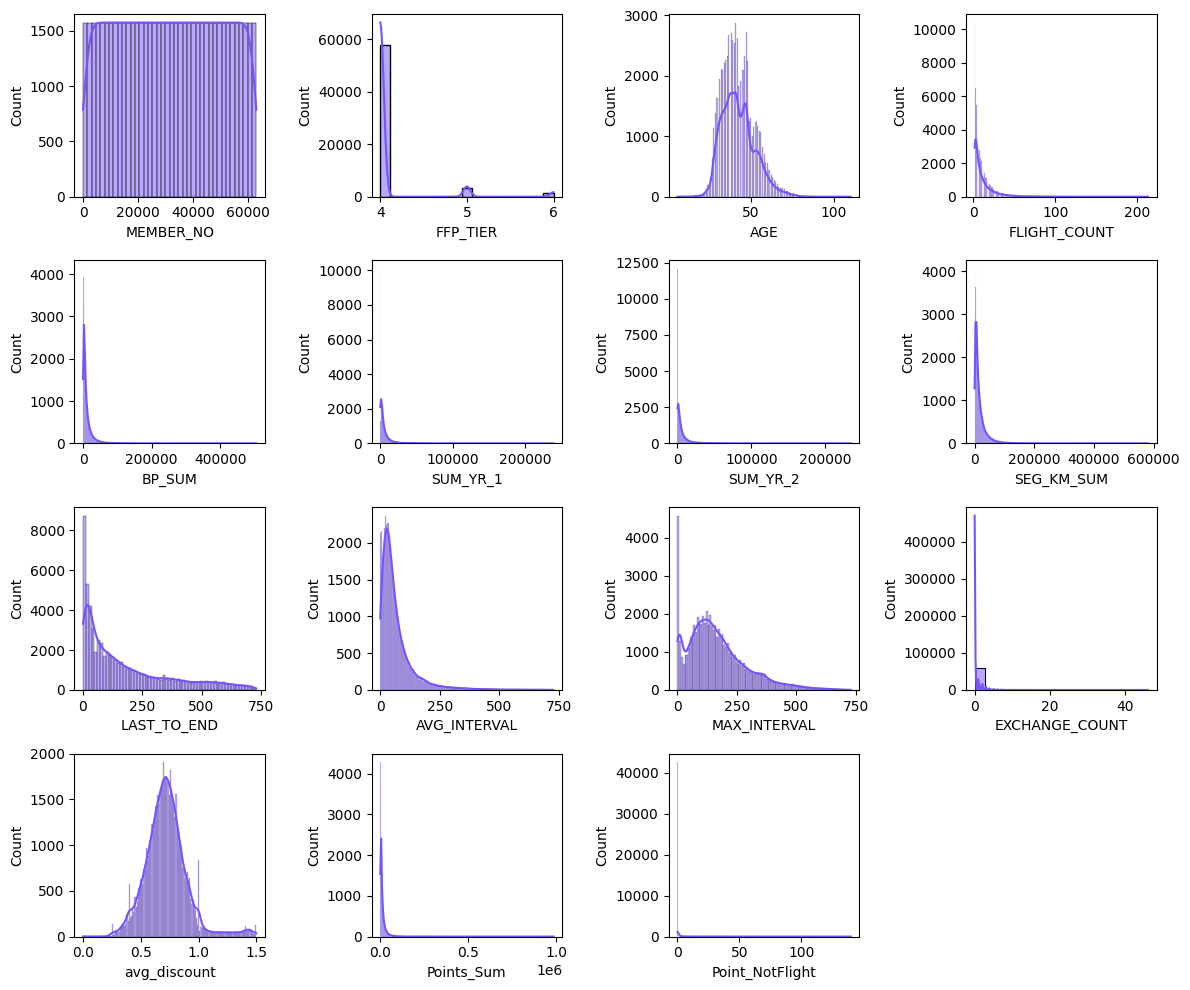

In [ ]:
features = kolom_numerik
n=4
plt.rcParams['figure.figsize'] = (12, 10)

for i in range(0, len(features)):

    plt.subplot(n, math.ceil(len(kolom_numerik)/n), i+1)
    sns.histplot(x=df[features[i]], kde=True, color='#7752FE')
    plt.xlabel(features[i])
    plt.tight_layout()


plt.show()

**Observasi :**
* Kebanyakan distribusi pada kolom numerik merupakan skew positif, kecuali Member_no, ffp_tier, avg_discount
* Pada kolom avg_discount terdapat nilai yang tidak valid yaitu > 1.0. Karena maksimal discount = 1.0 atau 100%. Sehingga, avg_discount > 1.0 akan di drop

In [ ]:
# handle invalid value avg_discount
df = df[df['avg_discount'] <= 1]

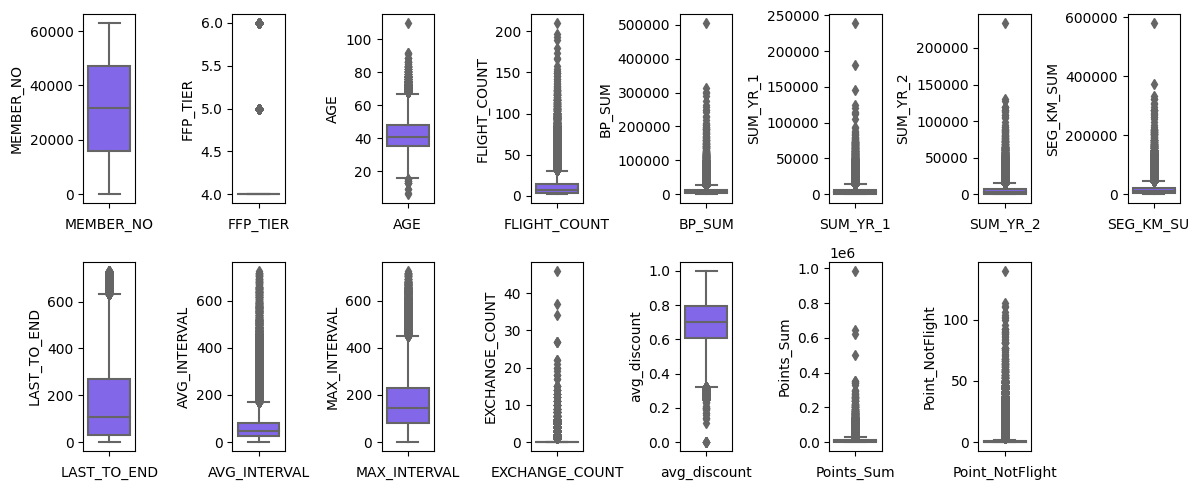

In [ ]:
features = kolom_numerik
n= 2
plt.rcParams['figure.figsize'] = (12, 5)
for i in range(0, len(features)):
    plt.subplot(n, math.ceil(len(kolom_numerik)/n), i+1)
    sns.boxplot(y=df[features[i]], color='#7752FE')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

**Observasi:**

Mayoritas kolom memiliki outlier, kecuali MEMBER_NO dan FFP_TIER

**Analisis Kategorik**

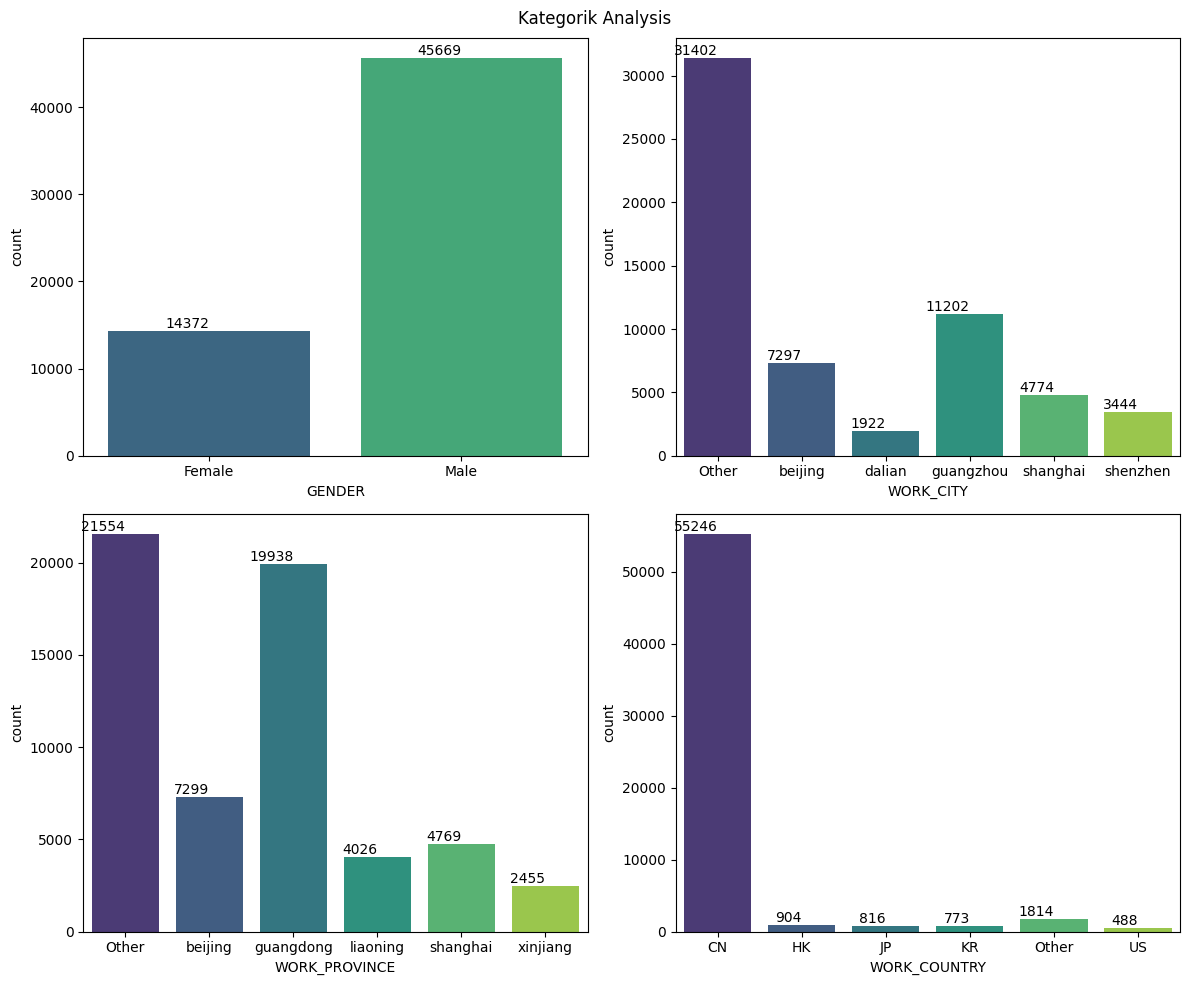

In [ ]:
# Memilih lima kategori terbesar dan menggabungkan sisanya menjadi "Other"
top_categories = 5
for col in kolom_kategorik:
    top_categories_count = df[col].value_counts().nlargest(top_categories)
    df[col] = df[col].apply(lambda x: x if x in top_categories_count else 'Other')

features = kolom_kategorik
n=2
plt.rcParams['figure.figsize'] = (12, 10)
fig = plt.figure()
fig.suptitle('Kategorik Analysis')

# Plotting barplot untuk kolom kategorikal
for i in range(0, len(features)):
    plt.subplot(n, math.ceil(len(kolom_kategorik)/n), i+1)
    value_counts = df[kolom_kategorik[i]].value_counts().sort_index()#sort = False)

    sns.countplot(x=(df[features[i]]).sort_values(ascending = True), palette="viridis")


    for x, count in enumerate(value_counts):
        plt.text(x, count, str(count), ha='right', va='bottom')

    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

Pada visualisasi tersebut menunjukkan bahwa :      
* `work_country` didominasi oleh CN (China)
* `gender` didominasi oleh male

Berdasarkan analisis tersebut, diputuskan bahwa kolom kategori tidak ada yang digunakan untuk pemodelan.

### **SOAL C**

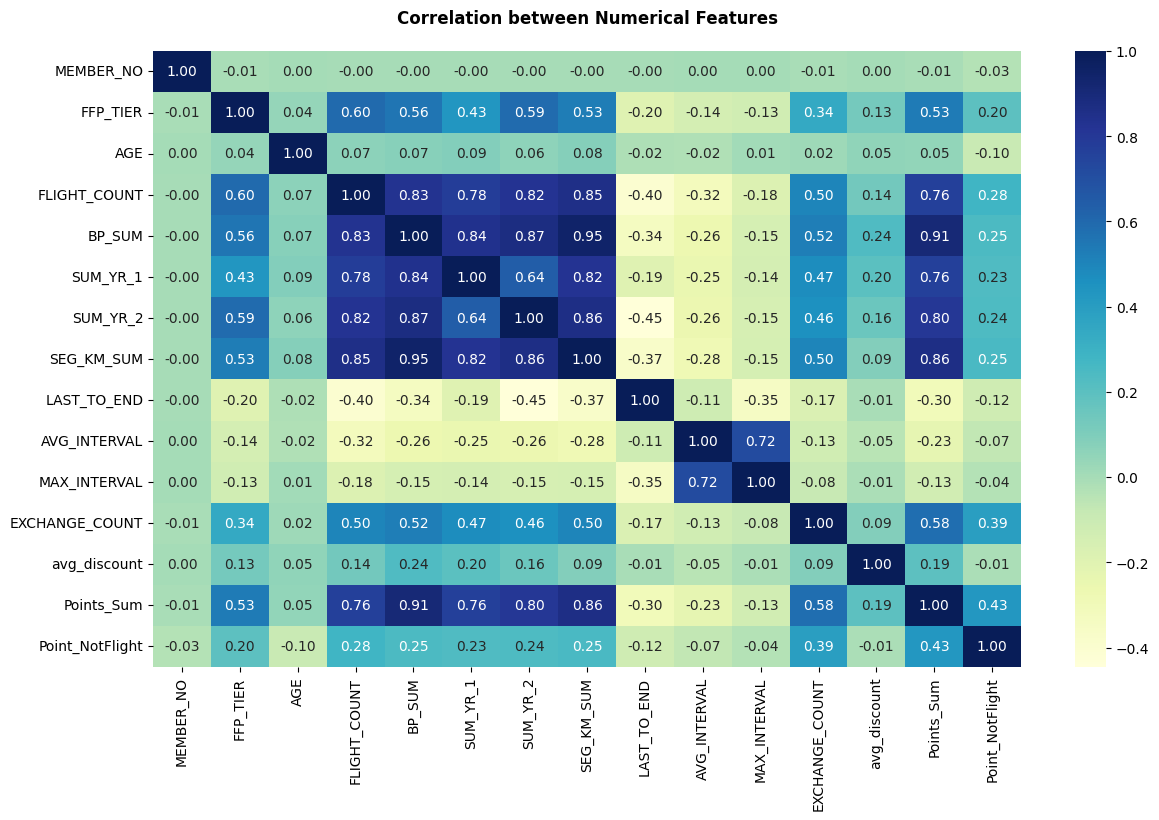

In [ ]:
#  Melihat korelasi antar feature dengan heatmap
features = kolom_numerik

plt.figure(figsize=(14, 8))
sns.heatmap(df[features].corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features', fontweight='bold', pad=20)
plt.show()

**Observasi:**  
Berdasarkan heatmap tersebut, fitur yang memiliki nilai korelasi rendah dalam proses clustering ini akan didrop dari dataset, yaitu :
* MEMBER_NO
* AGE
* AVG_INTERVAL
* MAX_INTERVAL
* EXCHANGE_COUNT
* Point_NotFlight


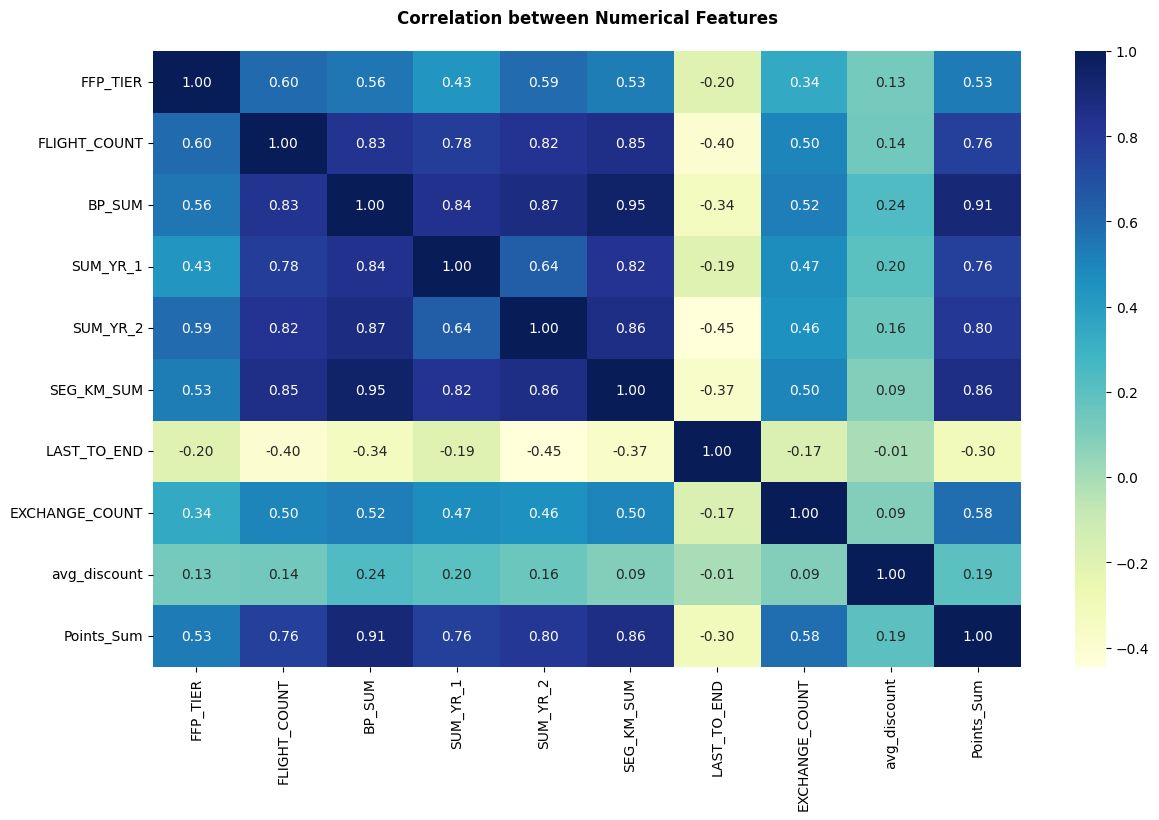

In [ ]:
kolom_hapus = ['MEMBER_NO', 'AGE', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Point_NotFlight']
features = [kolom for kolom in features if kolom not in kolom_hapus]

plt.figure(figsize=(14, 8))
sns.heatmap(df[features].corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features', fontweight='bold', pad=20)
plt.show()

Berdasarkan heatmap tersebut, terdapat fitur yang berkorelasi sangat tinggi, yaitu `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, `POINT_SUMS`. Untuk menghindari multikolinearitas, dalam modeling ini akan **dipilih** salah satu saja yaitu **`SEG_KM_SUM`**, sehingga **sisanya** yang **akan di drop :**
* BP_SUM
* SUM_YR_1
* SUM_YR_2
* POINTS_SUM

## **SOAL 2 Feature Engineering**

2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara
bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering! (20 poin)

Langkah-langkah:

a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

### Feature Selection I

Feature dipilih menggunakan konsep LRMFC (Loyalty, Recency, Monetary, Frequency, Cabin) :
* Recency (R) : column `LAST_TO_END` dapat mewakili R
* Frequency (F) : column `FLIGHT_COUNT` dapat mewakili F
* Monetary (M) : column `SEG_KM_SUM` dapat mewakili M   
Jika biasanya monetary mewakili total atau average transactions value, dalam hal penerbangan total jarak (km) penerbangan yang sudah dilakukan juga dapat mewakili monetary.


Untuk proses analisis lebih lanjut, terutama mengenai konsep selanjutnya yaitu Loyalty dan Cabin dapat dilakukan feature extraction yang memanfaatkan kolom
* `LOAD_TIME`
* `FFP_DATE`
* `avg_discount`


### Feature Extraction

In [ ]:
df_clean = df.copy()

In [ ]:
# Membuat kolom member duration
df_clean['Member_Duration'] = (df_clean['LOAD_TIME'] - df_clean['FFP_DATE']) / np.timedelta64(1, 'M')
df_clean['Member_Duration'] = df_clean['Member_Duration'].astype(int)

# Membuat kolom flight_count per year
jumlah_tahun = (df_clean['LAST_FLIGHT_DATE'] - df_clean['FIRST_FLIGHT_DATE']).dt.days // 365
df_clean['Flight_Count_perYear'] = (df_clean['FLIGHT_COUNT'] / jumlah_tahun)
df_clean['Flight_Count_perYear'] = df_clean['Flight_Count_perYear'].replace(np.inf, 0).astype(int)

Terdapat penambahan feature yang memanfaatkan 5 kolom yang sudah ada, yaitu:
* Membuat kolom `Member_Duration` -> dari kolom `LOAD_TIME` dan `FFP_DATE`   
Pengurangan kolom tersebut akan memberikan informasi mengenai durasi atau lamanya penumpang menjadi member.

* Membuat kolom `Flight_Count_perYear` -> dari kolom `LAST_FLIGHT_DATE` dan `FIRST_FLIGHT_DATE`   
Pengurangan kolom tersebut untuk menghitung jumlah tahun penumpang melakukan penerbangan. Kemudian dari kolom `FLIGHT_COUNT` yang sudah ada dibagi dengan jumlah tahun tersebut yang hasilnya akan memberikan informasi mengenai rata-rata frekuensi penerbangan yang dilakukan per tahunnya.

### Feature Selection II

Berdasarkan analisis yang telah dilakukan, diputuskan bahwa feature yang digunakan adalah:
* LAST_TO_END
* Flight_Count_perYear
* SEG_KM_SUM
* Member_Duration
* avg_discount

### Handling Outlier

In [ ]:
column_final = ['LAST_TO_END', 'Flight_Count_perYear', 'SEG_KM_SUM', 'Member_Duration', 'avg_discount']
print(f'Jumlah baris: {len(df_clean)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df_clean))
for col in column_final:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #mulai filter outlier
    filter_outlier = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit))
    outlier.append(len(df_clean[~filter_outlier]))
    no_outlier.append(len(df_clean[filter_outlier]))
    is_outlier.append(df_clean[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df_clean[~filtered_entries]))
print("Not Outlier All Data :", len(df_clean[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":column_final,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 60041
Outlier All Data : 9554
Not Outlier All Data : 50487



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,LAST_TO_END,True,-330.000000,630.000000,1678,58363
1,Flight_Count_perYear,True,-6.500000,13.500000,4537,55504
2,SEG_KM_SUM,True,-19557.000000,45163.000000,4535,55506
3,Member_Duration,False,-49.000000,143.000000,0,60041
4,avg_discount,True,0.322274,1.077878,499,59542


In [ ]:
# Kolom yang akan di-handle outlier
columns_to_handle_outlier = ['LAST_TO_END', 'avg_discount', 'Flight_Count_perYear', 'SEG_KM_SUM']

# Iterasi melalui setiap kolom untuk menangani outlier
for column in columns_to_handle_outlier:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas outlier
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Menghapus outlier dari DataFrame
    df_clean = df_clean[(df_clean[column] >= lower_limit) & (df_clean[column] <= upper_limit)]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49407 entries, 3936 to 62975
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MEMBER_NO             49407 non-null  int64         
 1   FFP_DATE              49407 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE     49407 non-null  datetime64[ns]
 3   GENDER                49407 non-null  object        
 4   FFP_TIER              49407 non-null  int64         
 5   WORK_CITY             49407 non-null  object        
 6   WORK_PROVINCE         49407 non-null  object        
 7   WORK_COUNTRY          49407 non-null  object        
 8   AGE                   49407 non-null  int64         
 9   LOAD_TIME             49407 non-null  datetime64[ns]
 10  FLIGHT_COUNT          49407 non-null  int64         
 11  BP_SUM                49407 non-null  int64         
 12  SUM_YR_1              49407 non-null  float64       
 13  SUM_YR_2     

In [ ]:
# Mengatur agar df hanya berisikan feature relevan
column_final = ['LAST_TO_END', 'Flight_Count_perYear', 'SEG_KM_SUM', 'Member_Duration', 'avg_discount']
df_final = df_clean[column_final].copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49407 entries, 3936 to 62975
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LAST_TO_END           49407 non-null  int64  
 1   Flight_Count_perYear  49407 non-null  int64  
 2   SEG_KM_SUM            49407 non-null  int64  
 3   Member_Duration       49407 non-null  int64  
 4   avg_discount          49407 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


In [ ]:
df_final.sample(5)

,LAST_TO_END,Flight_Count_perYear,SEG_KM_SUM,Member_Duration,avg_discount
62805,126,1,1306,38,0.400000
60248,431,4,1711,18,0.710696
10083,34,5,30469,72,0.716789
39000,2,1,11232,69,0.434352
32789,8,10,12205,38,0.538001


### Feature Transformation

Melakukan **standardisasi** kepada setiap feature agar memiliki skala yang sama.

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardisasi
scaler = StandardScaler()
columns_to_std = ['LAST_TO_END', 'Flight_Count_perYear', 'SEG_KM_SUM', 'Member_Duration', 'avg_discount']

# Loop untuk standardisasi kolom tersebut
for column in columns_to_std:
    df_final[f'{column}_std'] = scaler.fit_transform(df_final[[column]])

In [ ]:
# Insialisasi dataframe yang akan digunakan untuk pemodelan
data = df_final.copy()
data = data[['LAST_TO_END_std', 'Flight_Count_perYear_std', 'SEG_KM_SUM_std', 'Member_Duration_std', 'avg_discount_std']]

In [ ]:
pd.set_option('display.float_format', '{:.5f}'.format)

data.describe()

,LAST_TO_END_std,Flight_Count_perYear_std,SEG_KM_SUM_std,Member_Duration_std,avg_discount_std
count,49407.00000,49407.00000,49407.00000,49407.00000,49407.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00001,1.00001,1.00001,1.00001,1.00001
min,-1.07007,-2.58766,-1.24329,-1.34734,-2.58190
25%,-0.83345,-0.62234,-0.77850,-0.87298,-0.66947
50%,-0.33064,-0.29478,-0.31647,-0.25267,0.03468
75%,0.58034,0.36032,0.51017,0.80552,0.70193
max,2.65075,3.30831,3.19928,2.33806,2.14365


**Data siap** dilakukan modeling.

## **SOAL 3 Train Model Clustering K-Mean**

3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score (30 poin)

Langkah-langkah:

a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method

b. Lakukan clustering menggunakan K-means

c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA
apabila diperlukan


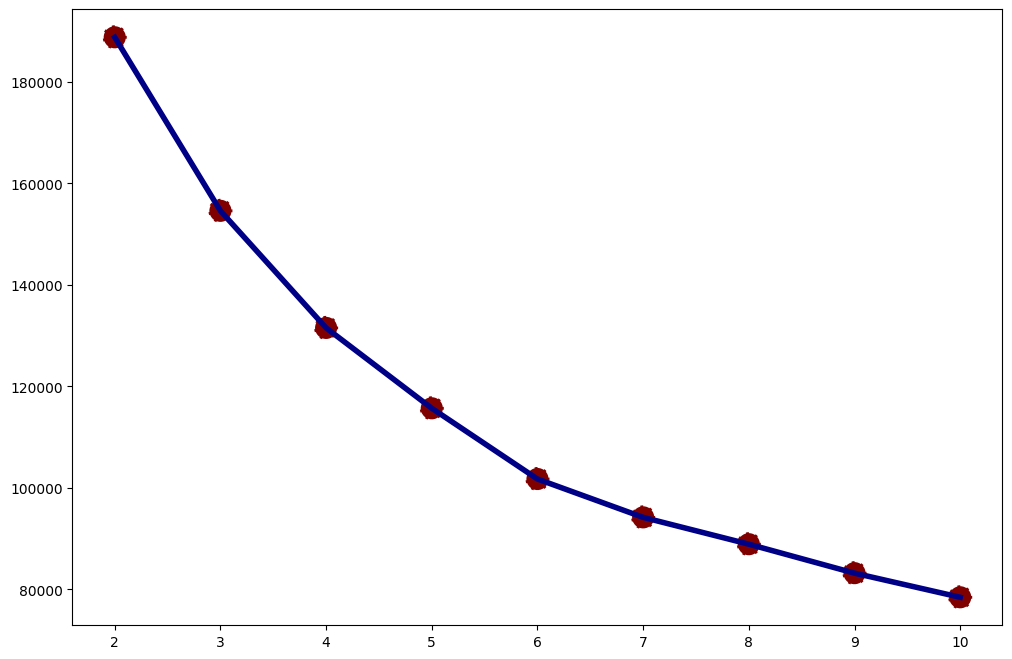

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12, 8))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

Berdasarkan elbow method tersebut, dapat terlihat bahwa jumlah clustering yang optimal adalah 4.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data.values)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Member_Duration,Flight_Count_perYear,clusters
24371,41048,2011-11-06,2011-11-06,Male,4,guangzhou,guangdong,CN,41,2014-03-31,...,83,60.66667,201,0,0.63904,7400,0,28,5,2
43710,19502,2009-09-27,2009-10-24,Female,4,shenzhen,guangdong,CN,31,2014-03-31,...,43,36.00000,62,0,0.56204,2388,0,54,1,3
29118,17806,2007-04-04,2007-04-04,Female,4,Other,liaoning,CN,34,2014-03-31,...,241,30.76923,180,2,0.62599,15173,29,83,2,0
24110,24242,2012-03-06,2012-03-06,Male,4,guangzhou,guangdong,CN,43,2014-03-31,...,106,23.40000,38,0,0.72240,8291,0,24,6,2
26616,25430,2012-12-24,2013-01-15,Male,4,guangzhou,guangdong,CN,32,2014-03-31,...,44,39.80000,93,0,0.60308,7047,0,15,11,2


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = clusters
df_pca.head()

,PC 1,PC 2,clusters
0,2.80759,2.02614,0
1,3.11045,0.87122,2
2,4.53152,-0.57354,2
3,2.76407,2.11628,0
4,0.98154,1.63622,0


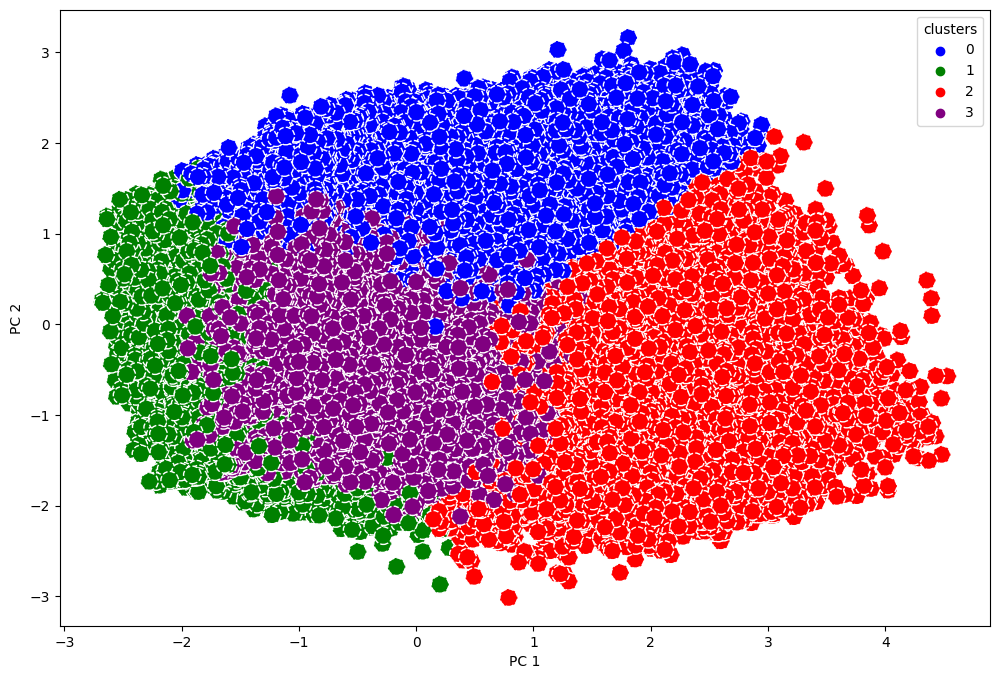

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    palette=['blue','green','red','purple'],
    s=160,
    ax=ax
)

plt.show()

## **SOAL 4 Interpretasi Clustering**

4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan
rekomendasi yang sesuai dengan cluster yang dihasilkan (30 poin)

Langkah-langkah:

a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster

c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi bisnis


In [ ]:
df_clean[['Member_Duration', 'LAST_TO_END', 'Flight_Count_perYear', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').agg(['mean', 'median'])

Member_Duration          LAST_TO_END           Flight_Count_perYear  \
                    mean   median        mean    median                 mean   
clusters                                                                       
0               81.05654 81.00000   105.06642  79.00000              1.39525   
1               41.11339 35.00000   442.32213 445.00000              1.80117   
2               34.35073 31.00000    93.52422  62.00000              7.67430   
3               31.11509 29.00000   127.53597 112.00000              1.91589   

                  SEG_KM_SUM             avg_discount          
          median        mean      median         mean  median  
clusters                                                       
0        1.00000 13698.90243 11936.00000      0.71135 0.71466  
1        2.00000  5436.43571  4268.00000      0.74159 0.75000  
2        7.00000 20150.88393 18859.50000      0.71272 0.71450  
3        2.00000  7050.66463  5999.50000      0.63607 0.63933

**Deskripsi tiap cluster:**  
1. **Cluster 0** merupakan pelanggan dengan member duration yang lama (rata-rata 81 bulan), sering melakukan penerbangan jarak jauh mengingat rata-rata total jarak penerbangan yang cukup tinggi (rata-rata 13698 km) dan jumlah penerbangan yang rendah (rata-rata 1 kali), cenderung sering melakukan penerbangan internasional. (**Pelanggan setia yang melakukan perjalanan internasional**)
2. **Cluster 1** merupakan pelanggan dengan member duration yang sedang (rata-rata 41 bulan), memiliki total jarak penerbangan dan jumlah penerbangan yang rendah (rata-rata 5436 km dan rata-rata 1 kali), serta memiliki jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir yang paling tinggi (rata-rata 442 hari). Pelanggan pada cluster ini perlu diberikan suatu treatment agar lebih banyak melakukan perjalanan dan menurunkan resiko untuk meninggalkan layanan. (**Pelanggan potensial yang memiliki kecenderungan tinggi meninggalkan layanan atau jarang melakukan kegiatan penerbangan)**)
3. **Cluster 2** merupakan pelanggan dengan member duration yang cukup rendah (rata-rata 34 bulan), cenderung sering melakukan penerbangan jarak yang lebih dekat mengingat jumlah penerbangan per tahunnya yang tinggi (rata-rata 7 kali) dengan total jarak penerbangan yang cukup tinggi (rata-rata 20150 km) atau cenderung sering melakukan penerbangan domestik, serta memiliki jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir yang rendah. (**Pelanggan aktif yang sering melakukan perjalanan domestik**)
4. **Cluster 3** merupakan pelanggan yang cukup baru atau member duration yang rendah (rata-rata 31 bulan), memiliki total jarak penerbangan yang sedang dan jumlah penerbangan yang  rendah. (**Pelanggan baru dengan kegiatan penerbangan yang rendah**)

**Rekomendasi Strategi Bisnis:**
* Memberikan promo atau penawaran khusus baik kepada member lama atau baru sebagai bentuk apresiasi kepada mereka (program loyalitas). Banyaknya promo atau jenis penawaran khusus yang diberikan disesuaikan dengan karakteristik mereka, seperti jika member tersebut suka melakukan penerbangan dengan jarak yang jauh maka berikan promo atau penawran khusus untuk jarak penerbangan jauh, begitu pula dengan jarak penerbangan yang sedang atau dekat untuk mendorong mereka melakukan lebih banyak penerbangan dan meningkatkan loyalitas.
* Meningkatkan kualitas pelayanan dan berikan inovasi pemasaran seperti penawaran paket perjalanan atau yang lain sesuai segmentasinya untuk mempertahankan pelanggan dan menarik pelanggan baru.
* Meningkatkan interaksi atau komunikasi dengan pelanggan yang jarang melakukan aktivitas melalui suatu kampanye pemasaran berbasis email atau direct message untuk menjaga mereka terlibat dan terhubung dengan layanan.
